# Exercise 2: Airpollution

In [3]:
airpollution = read.table("/Users/Wes/Downloads/airpollution.txt",header=TRUE)
View(airpollution) #

,day,wind,temperature,humidity,insolation,oxidant
,<int>,<int>,<int>,<int>,<int>,<int>
1,1,50,77,67,78,15
2,2,47,80,66,77,20
3,3,57,75,77,73,13
4,4,38,72,73,69,21
5,5,52,71,75,78,12
6,6,57,74,75,80,12
7,7,53,78,64,75,12
8,8,62,82,59,78,11
9,9,52,82,60,75,12


NOTE: 'day' is somewhat a weird variable, since it's non-trivial compared to the other explanatory variables.

So we exclude that variable in the analysis.

### a)  Discuss whether a contingency table test is appropriate here. If yes, perform this test in order to test whether the different medicines work equally well against nausea. Where are the main inconsistencies?

#### Make some graphical summaries of the data

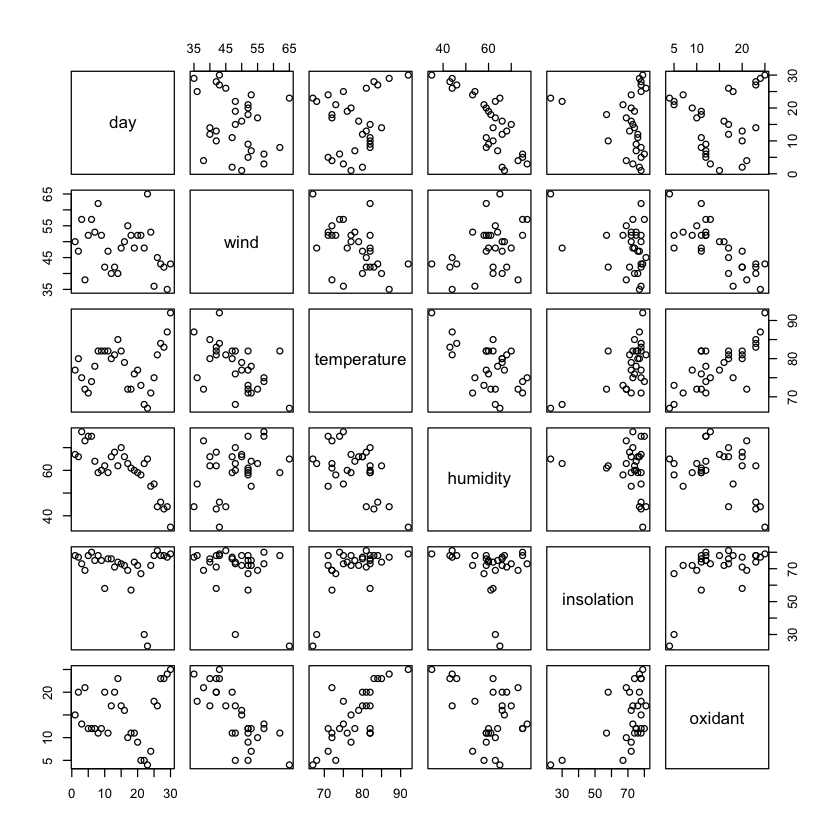

In [4]:
pairs(airpollution)

#### Investigate the problem of POTENTIAL and INFLUENCE points

"A leverage (or potential) point is an observation with an outlying value in the explanatory variable".



Call:
lm(formula = oxidant ~ wind + temperature + humidity + insolation, 
    data = airpollution)

Coefficients:
(Intercept)         wind  temperature     humidity   insolation  
  -15.49370     -0.44291      0.56933      0.09292      0.02275  


1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
0.00 0.01 0.03 0.20 0.01 0.02 0.00 0.00 0.03 0.00 0.06 0.04 0.00 0.00 0.01 0.00 
  17   18   19   20   21   22   23   24   25   26   27   28   29   30 
0.01 0.01 0.01 0.02 0.06 0.33 0.83 0.01 0.00 0.00 0.04 0.08 0.00 0.08

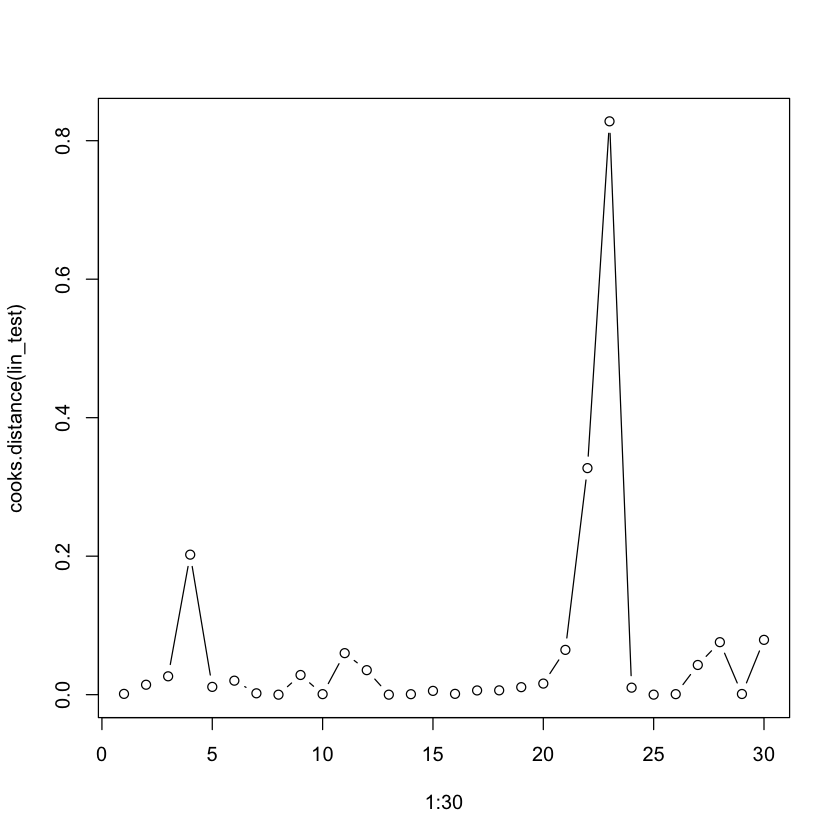

In [5]:
attach(airpollution)
lin_test = lm(oxidant~wind+temperature+humidity+insolation, data=airpollution)
lin_test

#Cook's test + plot
round(cooks.distance(lin_test),2)
plot(1:30,cooks.distance(lin_test),type="b")

As can be observed from cooks data and the plot, when x = 23, there is a relatively high Cook's distance of 0.83 (the leverage/potental point?)

However, this 0.83 at x=23 is not really close to 1, or larger than 1, which means that this point cannot be considered as an "influential point".

We, thus, do not need to exlude this value in our model.

#### Is there a problem of COLLINEARITY?

,day,wind,temperature,humidity,insolation,oxidant
day,1.00,-0.28,0.18,-0.81,-0.16,0.10
wind,-0.28,1.00,-0.50,0.37,-0.32,-0.77
temperature,0.18,-0.50,1.00,-0.54,0.57,0.76
humidity,-0.81,0.37,-0.54,1.00,-0.18,-0.35
insolation,-0.16,-0.32,0.57,-0.18,1.00,0.51
oxidant,0.10,-0.77,0.76,-0.35,0.51,1.00


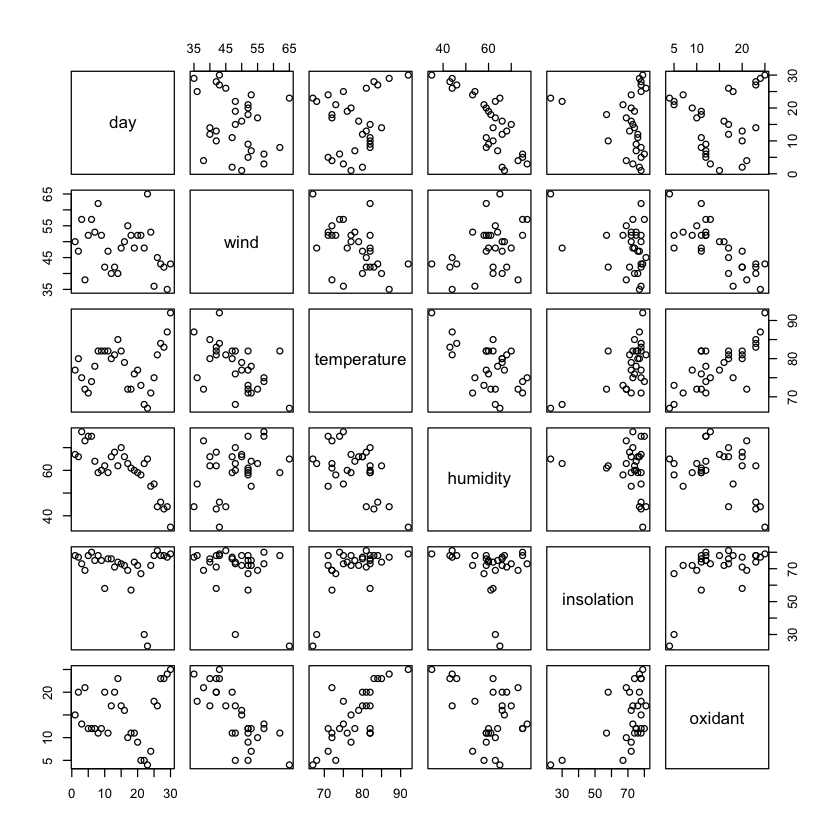

In [6]:
round(cor(airpollution),2)
pairs(airpollution)

As can be observed, the highest collinearity scores are between "humidity" and "day" (-0.81)

But does this indicate collinearity? 

Better is to use the "variance inflation factors (VIF)" method!

When larger than 5, there is reason for concern about colinearity

In [7]:
library(car); vif(lin_test)

Loading required package: carData



wind temperature    humidity  insolation 
   1.363044    2.259899    1.503797    1.533546

So, there is no collinearity whatsoever between the explanatory variables since all are far below 5!


---

### b)  Use the ADDED VARIABLE PLOT to depict the relationship between response oxidant and predictor wind. What is the meaning of the slope of fitted regression for this scatter plot?

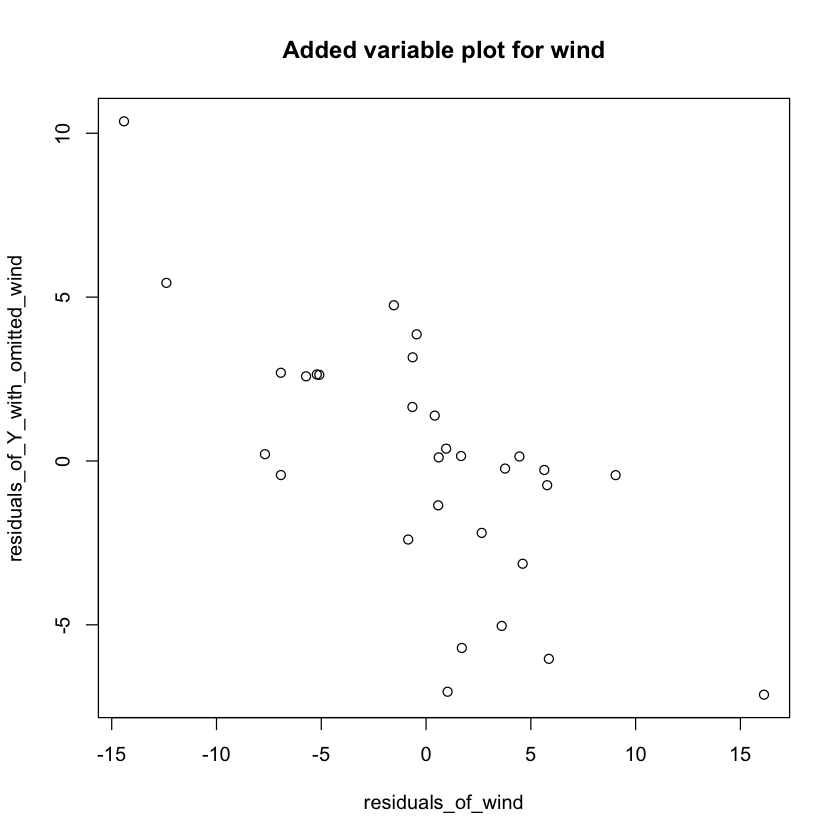

In [9]:
residuals_of_wind=residuals(lm(wind~temperature+humidity+insolation, data=airpollution))
residuals_of_Y_with_omitted_wind =residuals(lm(oxidant~temperature+humidity+insolation, data=airpollution))
plot(residuals_of_wind,residuals_of_Y_with_omitted_wind, main = "Added variable plot for wind")

The slope in this plot reflects the regression coefficients βj from the original multiple regression model, and the residuals in this plot are precisely the residuals from the original multiple regression.

Note that the angle of the line in the plot matches the sign of the coefficient from the estimated regression equation.

Or so to say, the beta values (for example -0.1 or 0.4) correspond to the slope (the first a negative slope, the second a positive slope)

https://www.statology.org/added-variable-plot-r/

---

### c)  Fit a linear regression model to the data. Use both the step-up and step-down methods to find the best model. If step-up and step-down yield two different models, choose one and motivate your choice.  

In [10]:
#The step up method:
#  1. start with the background model Y = β0 + e;
#  2. take the variable (that is not in the model) that yields the maximum
#     increase in R2;
#  3. if this variable is significant (t-test) add it to the model and go to step 2,
#     otherwise stop.

In [14]:
first = summary(lm(oxidant~wind,data=airpollution)) ; first #0.5863 (statistical significant )
second = summary(lm(oxidant~temperature,data=airpollution)) ; second #0.576 (statistical significant )
third = summary(lm(oxidant~humidity,data=airpollution)) ; third #0.124 (not statistical significant)
fourth = summary(lm(oxidant~insolation,data=airpollution)) ; fourth #0.2552 (statistical significant )


Call:
lm(formula = oxidant ~ wind, data = airpollution)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.9266 -2.5923  0.2065  2.6636  6.9077 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  45.3171     4.8976   9.253 5.19e-10 ***
wind         -0.6331     0.1005  -6.300 8.20e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.948 on 28 degrees of freedom
Multiple R-squared:  0.5863,	Adjusted R-squared:  0.5715 
F-statistic: 39.68 on 1 and 28 DF,  p-value: 8.205e-07



Call:
lm(formula = oxidant ~ temperature, data = airpollution)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9400 -2.2138  0.3775  2.5550 10.9099 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -46.4292     9.9542  -4.664 6.94e-05 ***
temperature   0.7850     0.1273   6.168 1.17e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.997 on 28 degrees of freedom
Multiple R-squared:  0.576,	Adjusted R-squared:  0.5609 
F-statistic: 38.04 on 1 and 28 DF,  p-value: 1.167e-06



Call:
lm(formula = oxidant ~ humidity, data = airpollution)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3358  -4.0749   0.8782   4.7800   8.7957 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  27.4446     6.4368   4.264 0.000206 ***
humidity     -0.2088     0.1049  -1.991 0.056317 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.745 on 28 degrees of freedom
Multiple R-squared:  0.124,	Adjusted R-squared:  0.09273 
F-statistic: 3.964 on 1 and 28 DF,  p-value: 0.05632



Call:
lm(formula = oxidant ~ insolation, data = airpollution)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.9723 -4.4841 -0.3281  4.7631  8.2686 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept) -1.43279    5.32967  -0.269  0.79003   
insolation   0.22993    0.07424   3.097  0.00441 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.297 on 28 degrees of freedom
Multiple R-squared:  0.2552,	Adjusted R-squared:  0.2286 
F-statistic: 9.592 on 1 and 28 DF,  p-value: 0.004411


##### Wind has highest R2 score, and is significant.

##### --> so add 'wind' to the model

##### Now repeat

In [15]:
second = summary(lm(oxidant~wind+temperature,data=airpollution)) ; second #0.7773 (statistical significant )
third = summary(lm(oxidant~wind+humidity,data=airpollution)) ; third #0.5913 (not statistical significant)
fourth = summary(lm(oxidant~wind+insolation,data=airpollution)) ; fourth #0.6613 (statistical significant )


Call:
lm(formula = oxidant ~ wind + temperature, data = airpollution)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3939 -1.8608  0.5826  1.9461  4.9661 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.20334   11.11810  -0.468    0.644    
wind        -0.42706    0.08645  -4.940 3.58e-05 ***
temperature  0.52035    0.10813   4.812 5.05e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.95 on 27 degrees of freedom
Multiple R-squared:  0.7773,	Adjusted R-squared:  0.7608 
F-statistic: 47.12 on 2 and 27 DF,  p-value: 1.563e-09



Call:
lm(formula = oxidant ~ wind + humidity, data = airpollution)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8120 -2.2808  0.3433  3.0476  5.8757 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 46.91570    5.68573   8.251 7.38e-09 ***
wind        -0.60955    0.10971  -5.556 6.86e-06 ***
humidity    -0.04516    0.07866  -0.574    0.571    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.996 on 27 degrees of freedom
Multiple R-squared:  0.5913,	Adjusted R-squared:  0.561 
F-statistic: 19.53 on 2 and 27 DF,  p-value: 5.674e-06



Call:
lm(formula = oxidant ~ wind + insolation, data = airpollution)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.2119 -2.7198  0.4815  2.8733  6.2012 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 32.32615    6.97098   4.637 8.07e-05 ***
wind        -0.55639    0.09778  -5.690 4.81e-06 ***
insolation   0.13161    0.05383   2.445   0.0213 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.638 on 27 degrees of freedom
Multiple R-squared:  0.6613,	Adjusted R-squared:  0.6362 
F-statistic: 26.36 on 2 and 27 DF,  p-value: 4.491e-07


##### Temperature has highest R2 score, and is significant.

##### --> so add 'temperature' to the model

##### Now repeat

In [16]:
third = summary(lm(oxidant~wind+temperature+humidity,data=airpollution)) ; third #0.7964 (not statistical significant)
fourth = summary(lm(oxidant~wind+temperature+insolation,data=airpollution)) ; fourth #0.7816 (not statistical significant )


Call:
lm(formula = oxidant ~ wind + temperature + humidity, data = airpollution)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5887 -1.1686  0.1978  1.9004  4.1544 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.60697   13.07154  -1.270    0.215    
wind         -0.44620    0.08513  -5.241 1.78e-05 ***
temperature   0.60190    0.11764   5.117 2.47e-05 ***
humidity      0.09850    0.06316   1.559    0.131    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.874 on 26 degrees of freedom
Multiple R-squared:  0.7964,	Adjusted R-squared:  0.7729 
F-statistic: 33.89 on 3 and 26 DF,  p-value: 3.904e-09



Call:
lm(formula = oxidant ~ wind + temperature + insolation, data = airpollution)

Residuals:
   Min     1Q Median     3Q    Max 
-6.407 -2.056  1.012  1.760  4.792 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.45496   11.26714  -0.395 0.695778    
wind        -0.42353    0.08737  -4.848 5.02e-05 ***
temperature  0.47558    0.12564   3.785 0.000816 ***
insolation   0.03646    0.05071   0.719 0.478636    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.976 on 26 degrees of freedom
Multiple R-squared:  0.7816,	Adjusted R-squared:  0.7565 
F-statistic: 31.02 on 3 and 26 DF,  p-value: 9.583e-09


##### There is no significant p-value outcome anymore for humidity and insolation

##### --> Add nothing, and STOP

#### See the final model below, including WIND and TEMPERATURE as explanatory variables 

In [19]:
final_model=summary(lm(oxidant~wind+temperature,data=airpollution)) ; final_model


Call:
lm(formula = oxidant ~ wind + temperature, data = airpollution)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3939 -1.8608  0.5826  1.9461  4.9661 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.20334   11.11810  -0.468    0.644    
wind        -0.42706    0.08645  -4.940 3.58e-05 ***
temperature  0.52035    0.10813   4.812 5.05e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.95 on 27 degrees of freedom
Multiple R-squared:  0.7773,	Adjusted R-squared:  0.7608 
F-statistic: 47.12 on 2 and 27 DF,  p-value: 1.563e-09


##### oxidant = -5.20334 + -0.42706 * wind + 0.52035 * temperature, with R2 = 0.7773

---

In [20]:
#The step down method:
#  1. start with the full model Y = β0 +β1X1 +...+βpXp +e;
#  2. test all variables by using the t-test;
#  3. if the largest p-value is larger than 0.05, remove the corresponding
#     variable and go back to step 2.

In [21]:
v1 = summary(lm(oxidant~wind+temperature+humidity+insolation, data=airpollution)) ; v1
#--> remove largest p-value, which is 'insolation'
#Now repeat


Call:
lm(formula = oxidant ~ wind + temperature + humidity + insolation, 
    data = airpollution)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5861 -1.0961  0.3512  1.7570  4.0712 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -15.49370   13.50647  -1.147  0.26219    
wind         -0.44291    0.08678  -5.104 2.85e-05 ***
temperature   0.56933    0.13977   4.073  0.00041 ***
humidity      0.09292    0.06535   1.422  0.16743    
insolation    0.02275    0.05067   0.449  0.65728    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.92 on 25 degrees of freedom
Multiple R-squared:  0.798,	Adjusted R-squared:  0.7657 
F-statistic: 24.69 on 4 and 25 DF,  p-value: 2.279e-08


##### --> remove largest p-value, which is 'insolation'

##### Now repeat

In [22]:
v2 = summary(lm(oxidant~wind+temperature+humidity, data=airpollution)) ; v2
#--> remove largest p-value, which is 'humidity'
#Now repeat


Call:
lm(formula = oxidant ~ wind + temperature + humidity, data = airpollution)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5887 -1.1686  0.1978  1.9004  4.1544 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -16.60697   13.07154  -1.270    0.215    
wind         -0.44620    0.08513  -5.241 1.78e-05 ***
temperature   0.60190    0.11764   5.117 2.47e-05 ***
humidity      0.09850    0.06316   1.559    0.131    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.874 on 26 degrees of freedom
Multiple R-squared:  0.7964,	Adjusted R-squared:  0.7729 
F-statistic: 33.89 on 3 and 26 DF,  p-value: 3.904e-09


##### --> remove largest p-value, which is 'humidity'

##### Now repeat

In [23]:
v3 = summary(lm(oxidant~wind+temperature, data=airpollution)) ; v3
#--> All p-values are significant (below 0.05)
#So STOP


Call:
lm(formula = oxidant ~ wind + temperature, data = airpollution)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3939 -1.8608  0.5826  1.9461  4.9661 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.20334   11.11810  -0.468    0.644    
wind        -0.42706    0.08645  -4.940 3.58e-05 ***
temperature  0.52035    0.10813   4.812 5.05e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.95 on 27 degrees of freedom
Multiple R-squared:  0.7773,	Adjusted R-squared:  0.7608 
F-statistic: 47.12 on 2 and 27 DF,  p-value: 1.563e-09


##### --> All p-values are significant (below 0.05)

##### So STOP

#### See the final model below, including WIND and TEMPERATURE as explanatory variables 

In [25]:
final_model=summary(lm(oxidant~wind+temperature,data=airpollution)) ; final_model


Call:
lm(formula = oxidant ~ wind + temperature, data = airpollution)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3939 -1.8608  0.5826  1.9461  4.9661 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.20334   11.11810  -0.468    0.644    
wind        -0.42706    0.08645  -4.940 3.58e-05 ***
temperature  0.52035    0.10813   4.812 5.05e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.95 on 27 degrees of freedom
Multiple R-squared:  0.7773,	Adjusted R-squared:  0.7608 
F-statistic: 47.12 on 2 and 27 DF,  p-value: 1.563e-09


#### oxidant = -5.20334 + -0.42706 * wind + 0.52035 * temperature, with R2 = 0.7773

And for the final linear model (there is no choice cuz both variable choice methods yield the same result) :

In [27]:
airpollutionlm = lm(oxidant~wind+temperature,data=airpollution) ; airpollutionlm


Call:
lm(formula = oxidant ~ wind + temperature, data = airpollution)

Coefficients:
(Intercept)         wind  temperature  
    -5.2033      -0.4271       0.5204  


#### Both model finding methods end up with exactly the SAME final model.


---

### d)  Determine 95% confidence and prediction intervals for oxidant using the model you preferred in c) for wind=33, temperature=54, humidity=77 and insolation=21.

Create this new instance (in the form of a dataframe). See it as row number 31 in the original DF

In [29]:
newxdata=data.frame(wind=33,temperature=54,humidity=77, insolation=21)
newxdata

wind,temperature,humidity,insolation
<dbl>,<dbl>,<dbl>,<dbl>
33,54,77,21


##### Confidence Interval:

In [30]:
predict(airpollutionlm,newxdata, interval = 'confidence')
# [1.656548 15.94907]

,fit,lwr,upr
1,8.80281,1.656548,15.94907


####  Confidence Interval: [1.656548, 15.94907]

---

##### Prediction Interval:

In [32]:
predict(airpollutionlm,newxdata, interval = 'prediction')
# [-0.5617877 18.16741]

,fit,lwr,upr
1,8.80281,-0.5617877,18.16741


#### Prediction Interval: [-0.5617877, 18.16741]

As can be observed, the prediction interval is larger than the confidence interval.

To summarize, confidence is for the population mean, prediction is for an individual observation.